In [ ]:
  from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/8° Semestre/IA M2 Benji/Dataset2_1"
!ls

Mounted at /content/drive
/content/drive/MyDrive/8° Semestre/IA M2 Benji/Dataset2_1
External	ModelASL.keras	    Test		     TestSavedModelASLTest.ipynb
ModelASL.ipynb	ModelASLTest.keras  TestSavedModelASL.ipynb  Train


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = os.path.join('Train')
test_dir = os.path.join('Test')

class_names = sorted(os.listdir(train_dir))
class_labels = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
    'K': 10, 'L': 11, 'M': 12, 'N': 13, 'Nothing': 14, 'O': 15, 'P': 16, 'Q': 17,
    'R': 18, 'S': 19, 'Space': 20, 'T': 21, 'U': 22, 'V': 23, 'W': 24, 'X': 25,
    'Y': 26, 'Z': 27
}
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=tf.image.rgb_to_grayscale,
    validation_split=0.2
    )
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 64,
    class_mode='sparse',
    subset='training',
    classes=class_names,
    shuffle=True,
    seed=42
    )
validation_generator = train_datagen.flow_from_directory(
    'Dataset2_1/Train',
    target_size=(64, 64),
    batch_size=64,
    class_mode='sparse',
    subset='validation',
    classes=class_names,
    shuffle=True,
    seed=42
    )
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=1,
    class_mode='sparse',
    classes=class_names,
    shuffle=False
    )

Found 22400 images belonging to 28 classes.
Found 0 images belonging to 28 classes.
Found 6900 images belonging to 28 classes.


In [ ]:
new_model = tf.keras.models.load_model("ModelASLTest.keras")

In [ ]:
# evaluate the model using images generated for test and the labels
num_test_samples = len(test_generator.filenames)
num_test_steps = num_test_samples // test_generator.batch_size

# Evaluate the model on the test data generator
test_loss, test_acc = new_model.evaluate(test_generator, steps=num_test_steps)
print('\nTest accuracy:', test_acc)
predictions = new_model.predict(test_generator)
predict_class = np.argmax(predictions, axis=1)
print('\nPredictClass:', predict_class.shape)

6900/6900 [==============================] - 2113s 306ms/step - loss: 0.0963 - accuracy: 0.9655

Test accuracy: 0.9655072689056396
6900/6900 [==============================] - 69s 10ms/step

PredictClass: (6900,)


In [ ]:
test_images = test_generator[0][0]
test_labels = test_generator[0][1]

In [ ]:
predictions = new_model.predict(test_images)
classes_x = np.argmax(predictions,axis=1)
classes_x

1/1 [==============================] - 0s 114ms/step


array([19])

6896/6901 [============================>.] - ETA: 0s

6901/6901 [==============================] - 75s 11ms/step


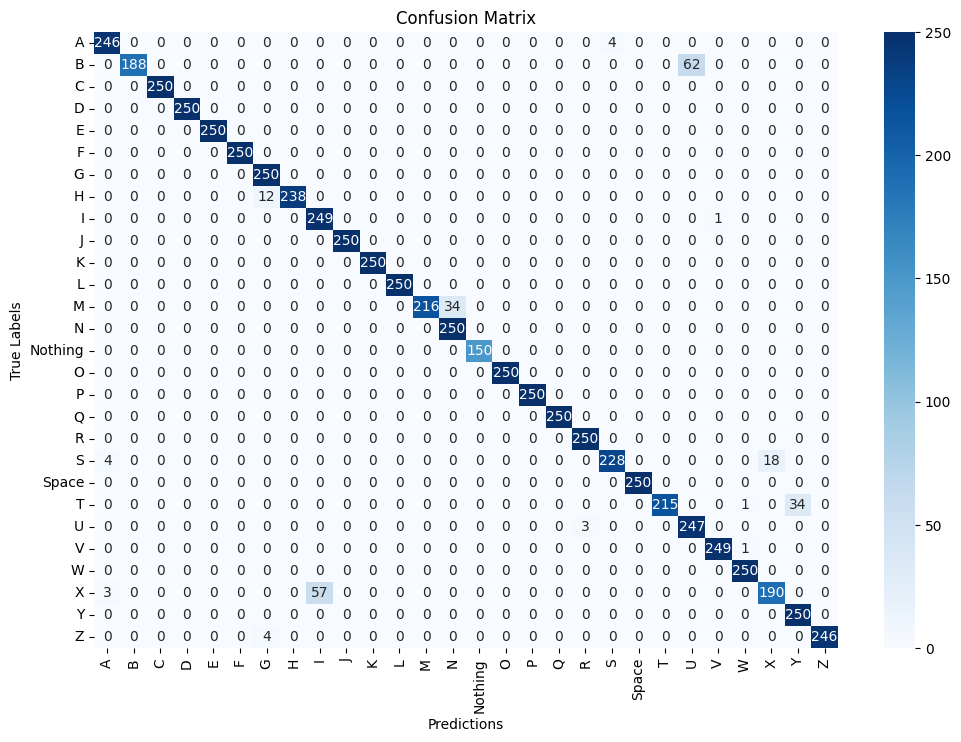

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = test_generator.classes

# Get the number of test samples
num_test_samples = len(test_generator.filenames)

# Get predictions for the entire test dataset
predictions = new_model.predict(test_generator, steps=num_test_samples // test_generator.batch_size + 1)

# Extract predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, acc = new_model.evaluate(test_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# Get predictions for the test data
predictions = new_model.predict(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Print the shape of predictions
print("Shape of predictions:", predictions.shape)

# Retrieve true labels from the test generator
true_labels = test_generator.classes

# Print misidentified predictions
misidentified_indices = np.where(predicted_classes != true_labels)[0]
print("Misidentified indices:", misidentified_indices)

# Print misidentified predictions and their corresponding actual labels
print("Misidentified predictions:")
for index in misidentified_indices:
    print("Index:", index)
    print("Predicted class:", class_names[predicted_classes[index]])
    print("Actual class:", class_names[true_labels[index]])

6900/6900 - 74s - loss: 0.0963 - accuracy: 0.9655 - 74s/epoch - 11ms/step
Restored model, accuracy: 96.55%
6900/6900 [==============================] - 75s 11ms/step
Shape of predictions: (6900, 28)
Misidentified indices: [   0  111  173  217  279  280  281  282  283  285  286  287  288  292
  293  294  296  297  298  299  300  301  302  303  304  305  307  308
  309  310  311  312  313  314  315  316  318  319  320  321  322  323
  324  325  326  327  329  330  331  332  333  334  335  336  337  338
  340  341  342  343  344  345  346  347  348  349 1977 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1994 2157 3033 3047 3048 3049 3050
 3101 3105 3107 3109 3110 3113 3114 3115 3116 3125 3126 3127 3128 3129
 3130 3131 3132 3213 3214 3215 3216 3218 3220 3221 3222 3225 3226 3227
 3229 4720 4723 4724 4725 4726 4727 4729 4730 4731 4732 4733 4734 4735
 4760 4763 4764 4765 4767 4814 4815 4816 4818 5151 5162 5173 5261 5273
 5284 5295 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 53

In [ ]:
def plot_images_with_predictions(num_images):
    plt.figure(figsize=(10 * num_cols, 2 * num_rows))
    images_shown = 0

    for batch_images, batch_labels in test_generator:
        # Get predictions for the entire batch
        batch_predictions = new_model.predict(batch_images)

        for i in range(len(batch_labels)):
            plt.subplot(num_rows, 2 * num_cols, 2 * images_shown + 1)
            plot_image(i, batch_predictions[i], batch_labels, batch_images)
            plt.subplot(num_rows, 2 * num_cols, 2 * images_shown + 2)
            plot_value_array(i, batch_predictions[i], batch_labels)

            images_shown += 1
            if images_shown >= num_images:
                break

        if images_shown >= num_images:
            break

    plt.tight_layout()
    plt.show()

def plot_image(i, predictions_array, true_label, img):
    true_label = int(true_label[i])  # Convert true_label to integer
    img = img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)

# Define plot_value_array function
def plot_value_array(i, predictions_array, true_label):
    true_label = int(true_label[i])  # Convert true_label to integer
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

1/1 [==============================] - 0s 31ms/step


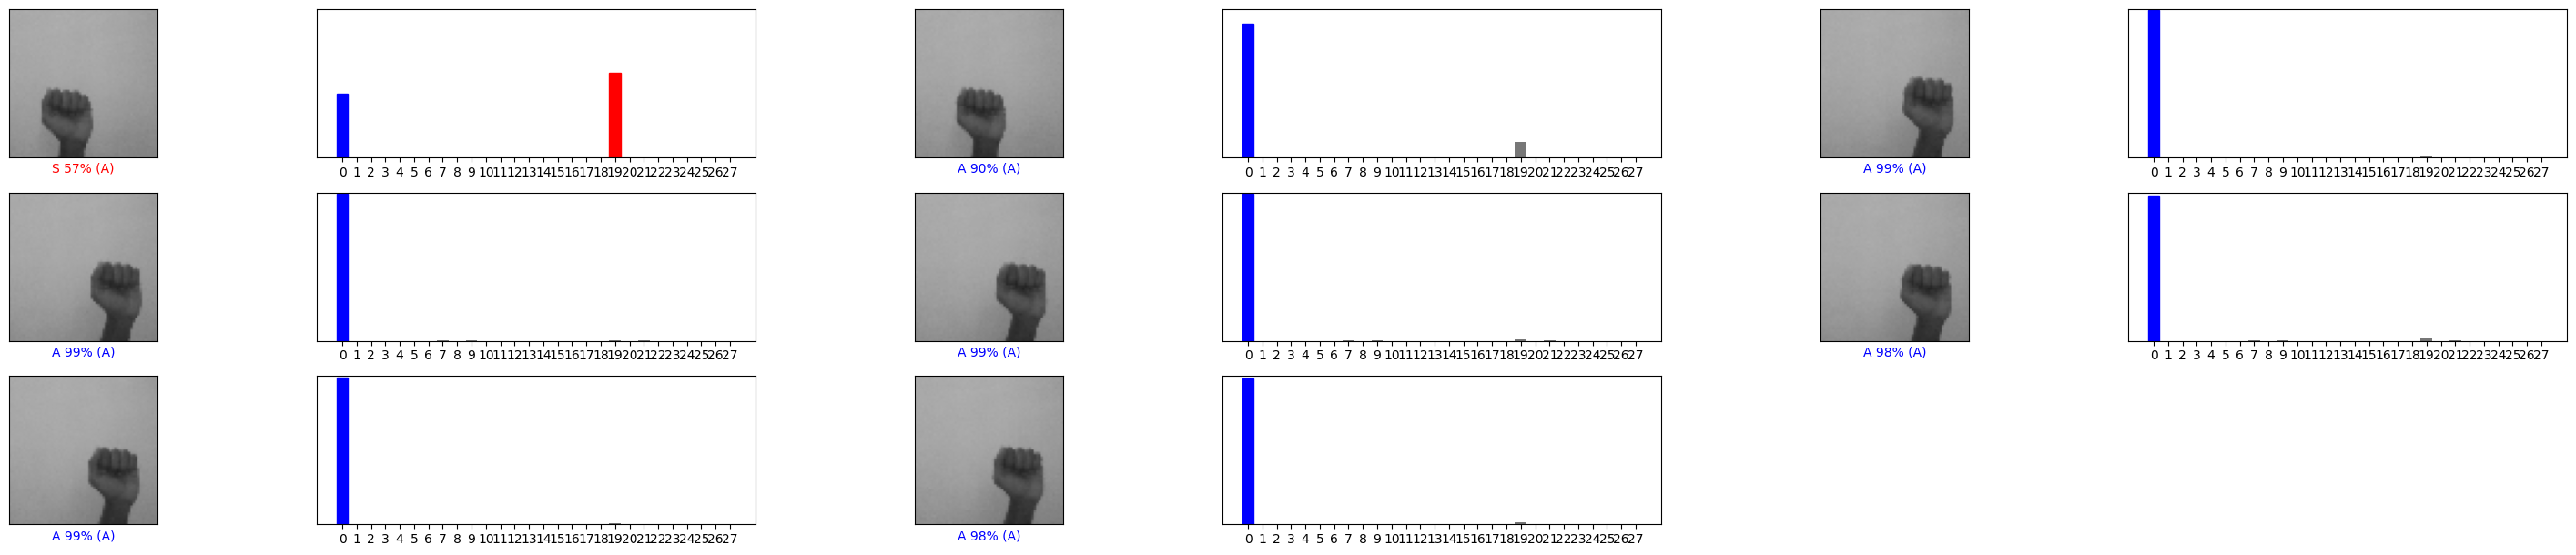

In [ ]:
num_rows = 5
num_cols = 3
num_images = 8
plot_images_with_predictions(num_images)

1/1 [==============================] - 0s 23ms/step


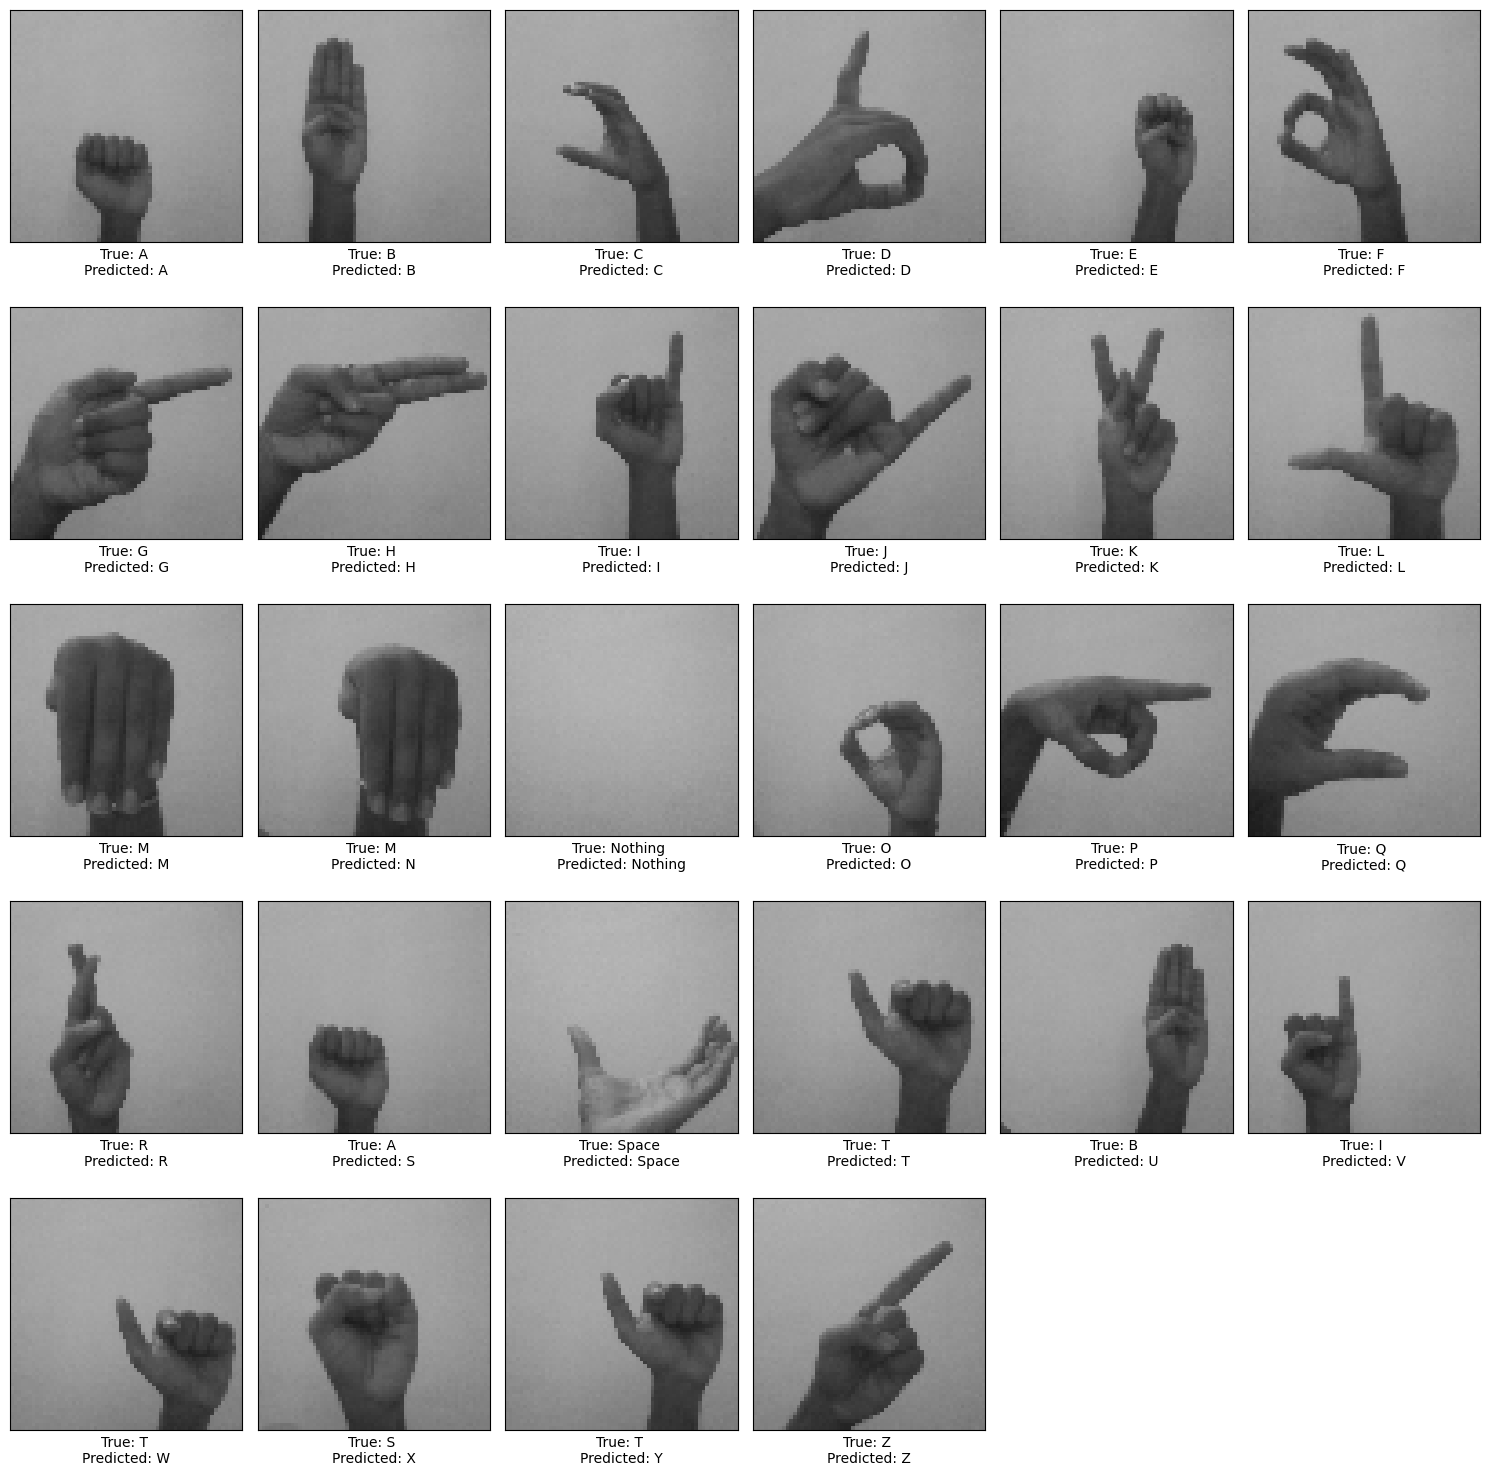

In [ ]:
plt.figure(figsize=(15, 15))
class_indices = {class_label: [] for class_label in range(len(class_names))}

# Gather indices of images for each class
for i, label in enumerate(predict_class):
    class_indices[label].append(i)
for i, class_label in enumerate(class_indices):
    # Get the index of the first image for the current class
    image_batch_index = class_indices[class_label][0] // test_generator.batch_size
    image_index_in_batch = class_indices[class_label][0] % test_generator.batch_size

    # Retrieve the batch of images
    batch_images, _ = test_generator[image_batch_index]

    # Predictions for the entire batch
    batch_predictions = new_model.predict(batch_images)

    # Plot the image
    plt.subplot(5, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(batch_images[image_index_in_batch], cmap=plt.cm.binary)

    # Get the predicted label for the first image in the batch
    predicted_label = np.argmax(batch_predictions[image_index_in_batch])

    plt.xlabel("True: {} \nPredicted: {}".format(
        class_names[test_generator.classes[image_batch_index * test_generator.batch_size + image_index_in_batch]],
        class_names[predicted_label]))

plt.tight_layout()
plt.show()

In [ ]:
external_dir = os.path.join('External')
ext_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )
ext_generator = ext_datagen.flow_from_directory(
    external_dir,
    target_size=(64, 64),
    batch_size=1,
    class_mode='sparse',
    shuffle=False
    )

Found 17 images belonging to 28 classes.


In [ ]:
# Predict classes for external images using ext_generator
external_predictions = new_model.predict(ext_generator)

# Map predicted class indices to class names
predicted_class_names = [class_names[np.argmax(prediction)] for prediction in external_predictions]

17/17 [==============================] - 2s 99ms/step


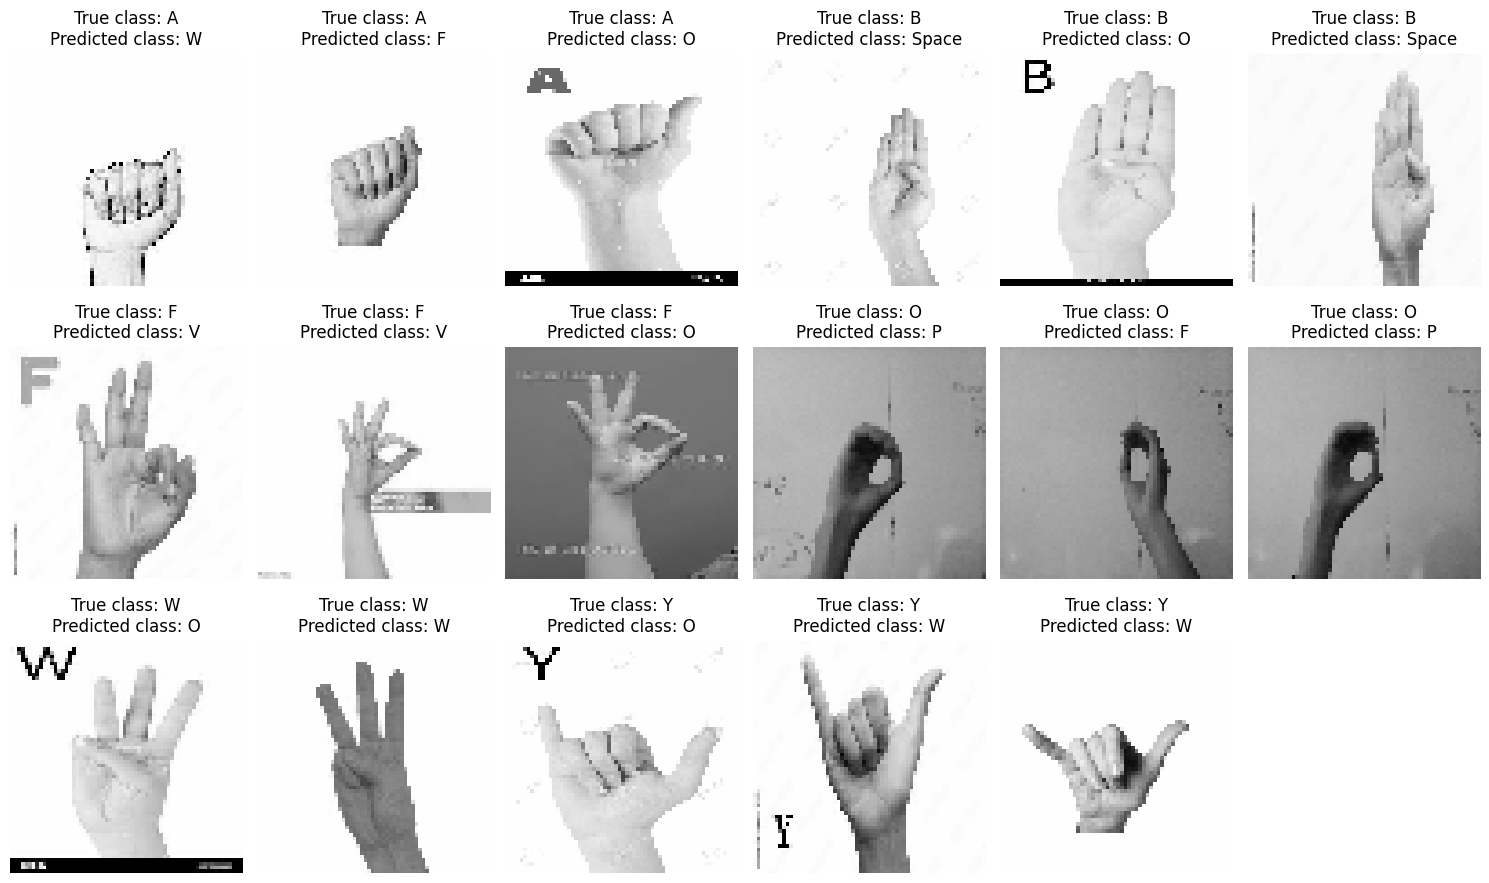

In [ ]:
def display_external_images_with_predictions(generator, predictions, true_labels, class_names):
    plt.figure(figsize=(15, 15))
    num_images = len(predictions)

    for i in range(num_images):
        image = generator[i][0]  # Access the images from the generator
        predicted_class_index = np.argmax(predictions[i])
        predicted_class_name = class_names[predicted_class_index]
        true_class_index = true_labels[i]
        true_class_name = class_names[true_class_index]

        plt.subplot(5, 6, i + 1)
        plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension if present
        plt.title("True class: {}\nPredicted class: {}".format(true_class_name, predicted_class_name))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display external images with their predicted and true classes
display_external_images_with_predictions(ext_generator, external_predictions, ext_generator.classes, class_names)